In [1]:
import re
from kbmodpy import kbmod as kb
import matplotlib.pyplot as plt
import numpy as np
import trajectoryFiltering as tf
%matplotlib inline

In [2]:
def load_trajectories(path):
    file = open(path, 'r')
    mega_string = ''
    for line in file.readlines():
        mega_string += line
    file.close()
    beginning_idx = mega_string.find('::::::')
    if beginning_idx == -1:
        beginning_idx = 0
    mega_string = mega_string[beginning_idx:]
    nums = re.findall(r"[-+]?\d*\.\d+|\d+", mega_string)
    loaded_trajectories = []
    nums_per_traj = 7
    for i in range(int(len(nums)/nums_per_traj)):
        idx = i*7
        t = kb.trajectory()
        t.lh = float(nums[idx+0])
        t.flux = float(nums[idx+1])
        t.x = int(float(nums[idx+2]))
        t.y = int(float(nums[idx+3]))
        t.x_v = float(nums[idx+4])
        t.y_v = float(nums[idx+5])
        t.obs_count = int(float(nums[idx+6]))
        loaded_trajectories.append(t)
    return loaded_trajectories

In [3]:
matched = load_trajectories('../analysis/generatedResults/matchedFaint.txt')
unmatched = load_trajectories('../analysis/generatedResults/unmatchedFaint.txt')

In [4]:
len(matched)

3807

In [5]:
real_result = kb.trajectory()
real_result.flux = 5300
real_result.x = 3123
real_result.y = 3044
real_result.x_v = 2425
real_result.y_v = 1050
real_result.obs_count = 0

In [6]:
matched_to_plot = [x for x in matched if not tf.compare_trajectory_once(x, real_result, 0.05, 2)]
unmatched_to_plot = unmatched
all_objects = []
for obj in matched_to_plot:
    all_objects.append(obj)
for obj in unmatched_to_plot:
    all_objects.append(obj)

In [7]:
print(len(matched_to_plot))
print(len(unmatched_to_plot))
print(len(all_objects))
print(len(matched_to_plot)/len(all_objects))

2947
493
3440
0.8566860465116279


In [8]:
def plot_histogram(results_to_plt, all_results, bins_c, name, title, color):
# the histogram of the data 
    plt.figure(figsize=(8,8))
    
    #n, bins, patches = plt.hist(np.array(results_to_plt), bins_c, normed=0, facecolor=color, alpha=0.75)
    
    histy, hist_bins = np.histogram(np.array(results_to_plt), bins=bins_c)
    hist_all, bins = np.histogram(np.array(all_results), bins=hist_bins)
    #print(hist_all)
    hist = np.divide(histy, hist_all)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    # add a 'best fit' line
    #y = mlab.normpdf( bins, mu, sigma)
    #l = plt.plot(bins, y, 'r--', linewidth=1)
    plt.xlabel(name)
    plt.ylabel('Occurances')
    plt.title(title)
    #plt.axis([*x_rng, *y_rng])
    plt.grid(True)
    plt.show()

In [15]:
bins = 30

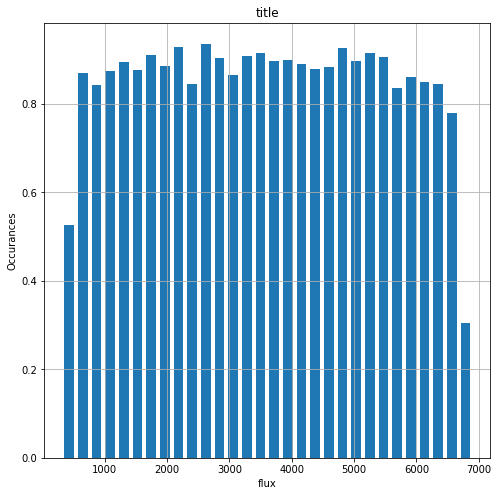

In [16]:
plot_histogram([t.flux for t in matched_to_plot],
               [t.flux for t in all_objects],
                bins, 'flux', 'title', 'green' )

In [8]:
def plot_histogram2D(x, y, bins_c):
# the histogram of the data
    plt.figure(figsize=(8,8))
    heatmap, xedges, yedges = np.histogram2d(np.array(x), 
        np.array(y), bins=bins_c)
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower')
    plt.colorbar()
    plt.show()

In [9]:
def plot_histogram2D_ratio(x, y, x_total, y_total, bins_c):
# the histogram of the data
    plt.figure(figsize=(8,8))
    heatmap, xedges, yedges = np.histogram2d(np.array(x), 
        np.array(y), bins=bins_c)
    
    heatmap_total, xedges, yedges = np.histogram2d(np.array(x_total), 
        np.array(y_total), bins=bins_c)
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmap_total.T[ heatmap_total.T == 0. ] = 1.
    
    ratio = np.divide( heatmap.T, heatmap_total.T )
    
    plt.clf()
    plt.imshow(ratio, extent=extent, origin='lower')
    plt.colorbar()
    plt.show()

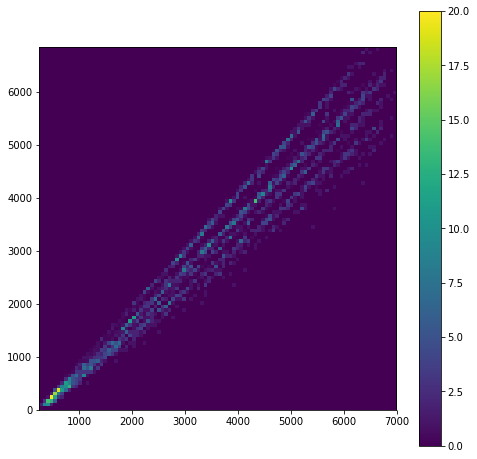

In [10]:
 plot_histogram2D_ratio(
    [t.flux for t in matched_to_plot],
    [20*t.lh for t in matched_to_plot],
    [t.flux for t in all_objects],
    [20*t.lh for t in all_objects], 100)

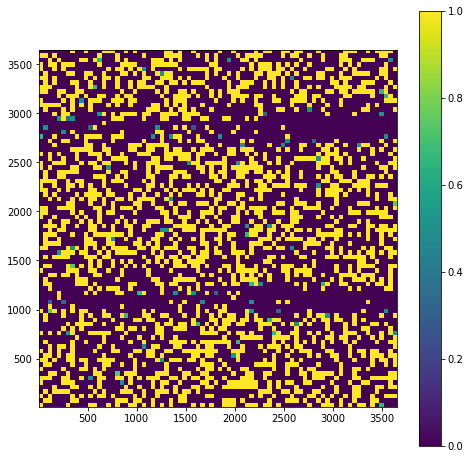

In [11]:
plot_histogram2D_ratio(
    [t.x for t in matched_to_plot],
    [t.y for t in matched_to_plot],
    [t.x for t in all_objects],
    [t.y for t in all_objects], 80)

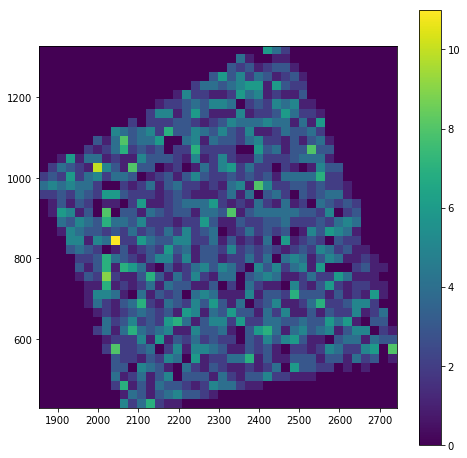

In [12]:
plot_histogram2D(
    [t.x_v for t in matched_to_plot],
    [t.y_v for t in matched_to_plot], 40)

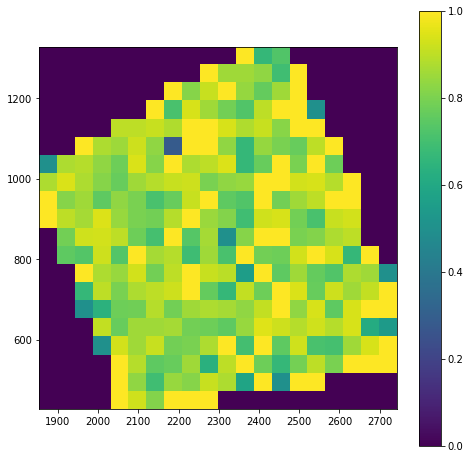

In [18]:
plot_histogram2D_ratio(
    [t.x_v for t in matched_to_plot],
    [t.y_v for t in matched_to_plot],
    [t.x_v for t in all_objects],
    [t.y_v for t in all_objects], 20)